# Output variable -> y. y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Logistic Regression\\bank-full.csv", sep = ";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.shape
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#One-Hot encoding - categorical variables such as job, marital status, education, contact, poutcome
bank1 = pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])

In [9]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [10]:
pd.set_option("display.max.columns", None)
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [11]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [13]:
bank1.isna().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64

In [14]:
#custom binary (0,1) encoding for columns default, housing, loan, y
bank1['default'] = np.where(bank1['default'].str.contains("yes"), 1, 0)
bank1['housing'] = np.where(bank1['housing'].str.contains("yes"), 1, 0)
bank1['loan'] = np.where(bank1['loan'].str.contains("yes"), 1, 0)
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)

In [15]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [17]:
bank1.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [18]:
month_order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [19]:
bank1 = bank1.replace(month_order)

In [20]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [22]:
# Dividing our data into input and output variables. 
X = pd.concat([bank1.iloc[:,0:11], bank1.iloc[:,12:]],axis = 1) #all columns except y and all rows
Y = bank1.iloc[:,11]  #only y column and all rows

### Building the model

In [23]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\yasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Predictions

In [24]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
y_pred_prob = classifier.predict_proba(X) #gives probability
y_pred_prob #([for 0, for 1])

array([[0.94757854, 0.05242146],
       [0.96339311, 0.03660689],
       [0.96868674, 0.03131326],
       ...,
       [0.3324503 , 0.6675497 ],
       [0.93327198, 0.06672802],
       [0.34938607, 0.65061393]])

In [26]:
y_pred_df= pd.DataFrame({'actual': Y, 'predicted' : y_pred, 'prob[0]' : y_pred_prob[:,0],
                         'prob[1]' : y_pred_prob[:,1]})
y_pred_df

,actual,predicted,prob[0],prob[1]
0,0,0,0.947579,0.052421
1,0,0,0.963393,0.036607
2,0,0,0.968687,0.031313
3,0,0,0.972580,0.027420
4,0,0,0.845374,0.154626
...,...,...,...,...
45206,1,1,0.372519,0.627481
45207,1,0,0.810122,0.189878
45208,1,1,0.332450,0.667550
45209,0,0,0.933272,0.066728


In [27]:
pd.crosstab(y_pred_df.actual, y_pred_df.predicted) #simple confusion matrix

predicted,0,1
actual,,
0,38973,949
1,3986,1303


In [28]:
y_pred_df.predicted.value_counts()

0    42959
1     2252
Name: predicted, dtype: int64

In [29]:
y_pred_df.actual.value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [30]:
bank1.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [31]:
#proportion of majority class
max(bank1.y.value_counts())/len(bank1.y)

0.8830151954170445

The accuracy calculated below should be greater than proportion of majority class. This is to see if our model is good enough or not. This is one of the measures to check that not the only one!

In [32]:
# confusion matrix for model accuracy
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
accuracy = accuracy_score(y_pred_df.actual, y_pred_df.predicted)
print (cm, accuracy)

[[38973   949]
 [ 3986  1303]] 0.8908451483046161


The model accuracy is calculated to be equal to 89.084%

In [33]:
TN = cm[0,0] #True Negative
TP = cm[1,1] #True Positive
FP = cm[0,1] #False Positive
FN = cm[1,0] #False Negative
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision_p = TP / (TP + FP)
precision_n = TN / (TN + FN)
print(sensitivity,specificity,precision_p,precision_n)

0.24636037058045 0.9762286458594259 0.5785968028419183 0.9072138550711143


In [34]:
Accuracy = np.sum([cm[0,0], cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8908451483046161


In [35]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.58      0.25      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [36]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

df_new = pd.DataFrame({"fpr":fpr, "tpr":tpr, "cutoff":thresholds})
df_new
optimal_tpr = df_new[np.round(df_new["tpr"],2)==0.65]
optimal_cutoff = optimal_tpr[np.round(optimal_tpr["fpr"],2)==0.25]
optimal_cutoff

,fpr,tpr,cutoff


Text(0, 0.5, 'True Positive Rate')

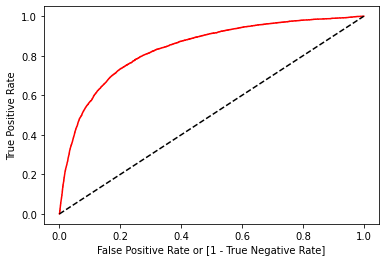

In [37]:
plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1],[0,1], 'k--') 
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [38]:
auc = roc_auc_score(Y, y_pred)
print('auc with 0.5 as cutoff', auc)

auc with 0.5 as cutoff 0.611294508219938


In [39]:
prob = classifier.predict_proba(X)
prob = prob[:,1]

new_pred = pd.DataFrame({'actual':Y, "pred":0})
new_pred
new_pred.loc[prob>0.57, "pred"] = 1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [40]:
cm_new = pd.crosstab(new_pred.actual, new_pred.pred)
print(cm_new)
print(classification_report(new_pred.actual, new_pred.pred))

pred        0     1
actual             
0       39239   683
1        4233  1056
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [41]:
auc2 = roc_auc_score(Y, new_pred.pred)
print('auc with 0.57 as cutoff', auc2)

auc with 0.57 as cutoff 0.5912756548553855
